# Load Data 

In [1]:
! unzip "/content/drive/MyDrive/AI Colab/Internship/Task - 1 (Alien vs Predator Image Classification)/Data.zip"

Archive:  /content/drive/MyDrive/AI Colab/Internship/Task - 1 (Alien vs Predator Image Classification)/Data.zip
  inflating: alien_vs_predator_thumbnails/data/train/alien/0.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/1.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/10.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/100.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/101.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/102.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/103.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/104.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/105.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/106.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/107.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/108.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/109.jp

# Importing Libraries

In [24]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Data Preprocessing

In [17]:
train_data_gen = ImageDataGenerator(zoom_range=0.3,
                                    rotation_range=25,
                                    featurewise_center=True,
                                    brightness_range=[0.7,1.7],
                                    horizontal_flip = True,
                                    rescale = 1./255).flow_from_directory('/content/data/train',
                                                                          class_mode = "binary",
                                                                          color_mode='rgb',
                                                                          target_size = (224,224),
                                                                          batch_size=32)
                                    
test_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory('/content/data/validation',
                                                                         class_mode = "binary",
                                                                         color_mode='rgb',
                                                                         target_size = (224,224),
                                                                         batch_size=32)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Create And Train Model

In [18]:
input_X = Input(shape=(224, 224, 3))

X = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(input_X)
X = Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu')(X)
X = MaxPool2D(pool_size=(2,2), padding='same')(X)

X = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(X)
X = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu')(X)
X = MaxPool2D(pool_size=(2,2), padding='same')(X)

X = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(X)
X = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu')(X)
X = MaxPool2D(pool_size=(2,2), padding='same')(X)

X = Flatten()(X)
X = Dense(units=64, activation='relu')(X)
X = Dense(units=64, activation='relu')(X)
X = Dense(units=32, activation='relu')(X)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(inputs=input_X, outputs=X)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 222, 222, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 111, 111, 32)      9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0   

In [19]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
H = model.fit(train_data_gen,
              validation_data = test_data_gen,
              batch_size = 32,
              epochs = 20)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
22/22 [==============================] - 17s 612ms/step - loss: 0.7190 - accuracy: 0.5124 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/20
22/22 [==============================] - 12s 548ms/step - loss: 0.6542 - accuracy: 0.6104 - val_loss: 0.6261 - val_accuracy: 0.6250
Epoch 3/20
22/22 [==============================] - 12s 543ms/step - loss: 0.6048 - accuracy: 0.7055 - val_loss: 0.6000 - val_accuracy: 0.6900
Epoch 4/20
22/22 [==============================] - 12s 543ms/step - loss: 0.5622 - accuracy: 0.7224 - val_loss: 0.5678 - val_accuracy: 0.6950
Epoch 5/20
22/22 [==============================] - 12s 543ms/step - loss: 0.5635 - accuracy: 0.7044 - val_loss: 0.6281 - val_accuracy: 0.5750
Epoch 6/20
22/22 [==============================] - 12s 546ms/step - loss: 0.5725 - accuracy: 0.6839 - val_loss: 0.5642 - val_accuracy: 0.7100
Epoch 7/20
22/22 [==============================] - 12s 545ms/step - loss: 0.5078 - accuracy: 0.7814 - val_loss: 0.5762 - val_accuracy: 0.7350

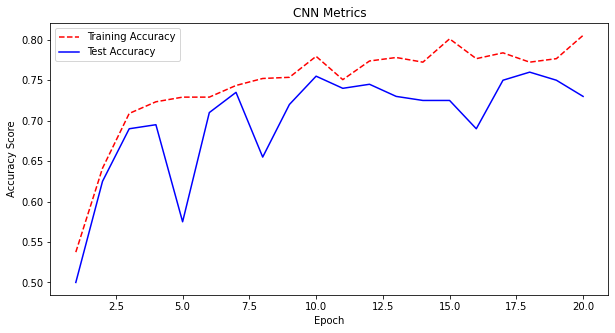

In [22]:
training_accuracy = H.history["accuracy"]
test_accuracy = H.history["val_accuracy"]

plt.figure(figsize=(10,5))

plt.plot(range(1,21), training_accuracy, "r--")
plt.plot(range(1,21), test_accuracy, "b-")

plt.title("CNN Metrics")
plt.legend(["Training Accuracy", "Test Accuracy"]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

# Transfer Learning

In [30]:
base = Xception(weights="imagenet", include_top=False)

X = GlobalAveragePooling2D()(base.output)
X = Dense(64,activation="relu")(X)
X = Dense(64,activation="relu")(X)
X = Dense(1,activation="sigmoid")(X)

tranfer_model = Model(inputs=base.input, outputs=X)

for layer in base.layers:
    layer.trainable=False

In [31]:
optimizer = SGD(lr=0.2, momentum=0.9, decay=0.01)
tranfer_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics = 'accuracy')

H2 = tranfer_model.fit(train_data_gen,
                       validation_data=test_data_gen,
                       epochs=20)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
22/22 [==============================] - 19s 698ms/step - loss: 0.6260 - accuracy: 0.6088 - val_loss: 0.4233 - val_accuracy: 0.8800
Epoch 2/20
22/22 [==============================] - 14s 652ms/step - loss: 0.3008 - accuracy: 0.8918 - val_loss: 0.2819 - val_accuracy: 0.9000
Epoch 3/20
22/22 [==============================] - 15s 657ms/step - loss: 0.2275 - accuracy: 0.9323 - val_loss: 0.2633 - val_accuracy: 0.9000
Epoch 4/20
22/22 [==============================] - 14s 653ms/step - loss: 0.1857 - accuracy: 0.9117 - val_loss: 0.2622 - val_accuracy: 0.9050
Epoch 5/20
22/22 [==============================] - 15s 659ms/step - loss: 0.1701 - accuracy: 0.9353 - val_loss: 0.3180 - val_accuracy: 0.9150
Epoch 6/20
22/22 [==============================] - 14s 654ms/step - loss: 0.2040 - accuracy: 0.9356 - val_loss: 0.2418 - val_accuracy: 0.9050
Epoch 7/20
22/22 [==============================] - 14s 650ms/step - loss: 0.1432 - accuracy: 0.9364 - val_loss: 0.2882 - val_accuracy: 0.8950

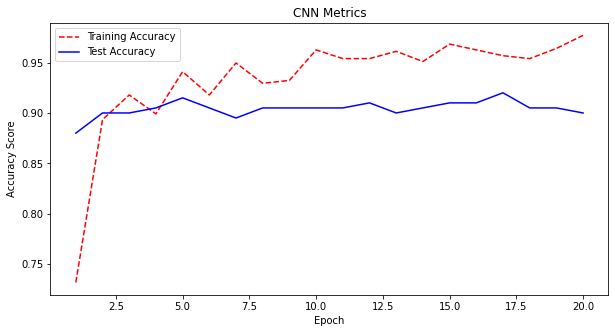

In [32]:
training_accuracy = H2.history["accuracy"]
test_accuracy = H2.history["val_accuracy"]

plt.figure(figsize=(10,5))

plt.plot(range(1,21), training_accuracy, "r--")
plt.plot(range(1,21), test_accuracy, "b-")

plt.title("CNN Metrics")
plt.legend(["Training Accuracy", "Test Accuracy"]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();